In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog  # For HOG feature extraction
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test
from sklearn.metrics import accuracy_score  # For evaluating accuracy

In [2]:
dataset_path = "C:\\Users\\vedee\\Downloads\\archive (11)\\raw"

In [3]:
X = []
y = []
image_paths = []  # To store image paths for display

In [4]:
for folder in os.listdir(os.path.join(dataset_path, 'ClientRaw')):
    folder_path = os.path.join(dataset_path, 'ClientRaw', folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (128, 64))  # Resize image to 128x64 pixels
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            X.append(hog_features)
            y.append(0)  # Label for real images
            image_paths.append(img_path)  # Store the image path

In [5]:
for folder in os.listdir(os.path.join(dataset_path, 'ImposterRaw')):
    folder_path = os.path.join(dataset_path, 'ImposterRaw', folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, (128, 64))  # Resize to match HOG input size
            hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
            X.append(hog_features)
            y.append(1)  # Label for fake images
            image_paths.append(img_path)  # Store the image path

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
X_train, X_test, y_train, y_test, train_image_paths, test_image_paths = train_test_split(X, y, image_paths, test_size=0.2, random_state=42)

In [8]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
predictions = rf_classifier.predict(X_test)
print(f"Predictions: {predictions[:5]}")  # Display first 5 predictions

Predictions: [1 1 0 1 1]


In [10]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.92%


In [12]:
def display_predictions(test_image_paths, predictions, num_images=10):
    for i in range(num_images):
        img = cv2.imread(test_image_paths[i])  # Load the original image
        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
            plt.title("Prediction: " + ("Real" if predictions[i] == 0 else "Fake"))
            plt.axis('off')
            plt.show()
        else:
            print(f"Image not found at: {test_image_paths[i]}")

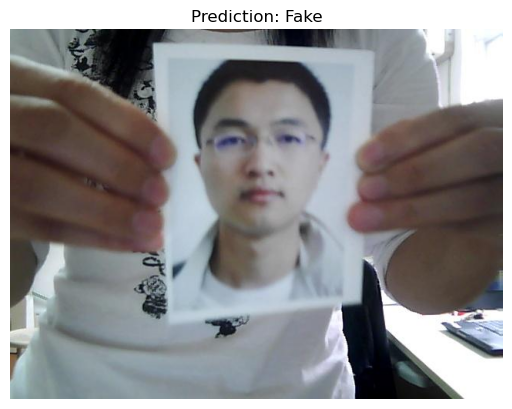

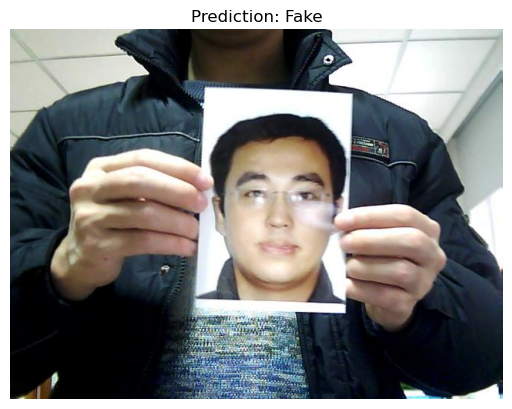

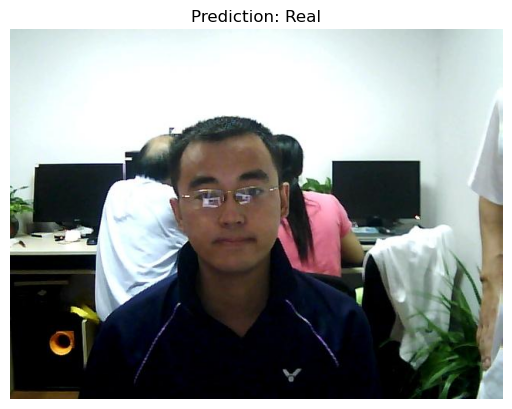

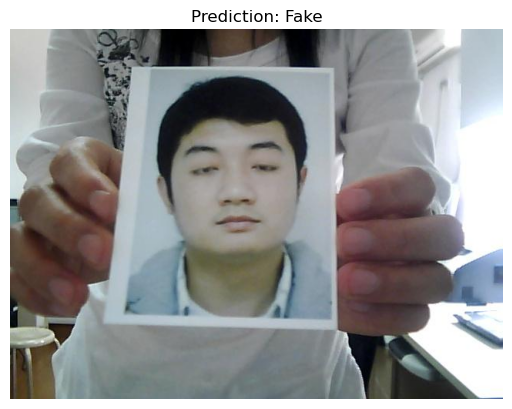

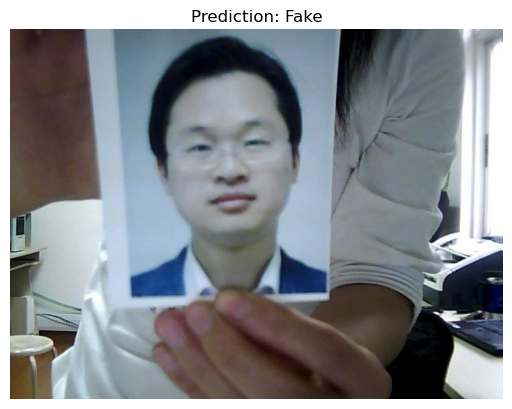

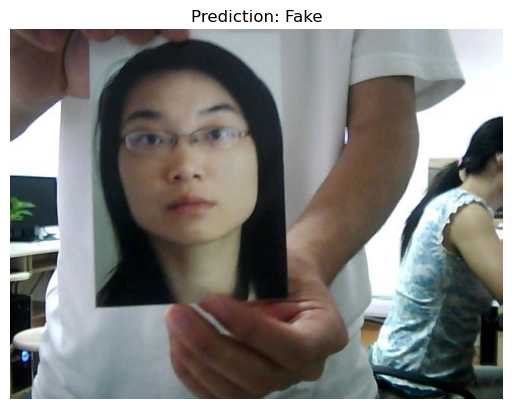

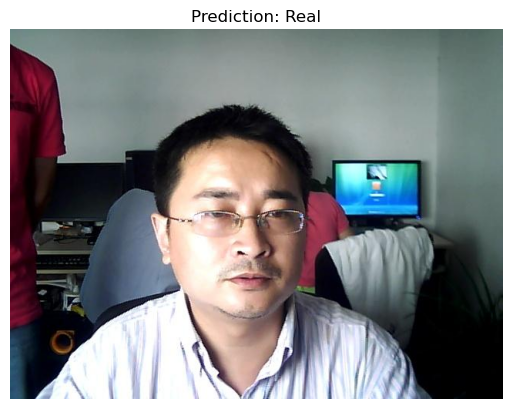

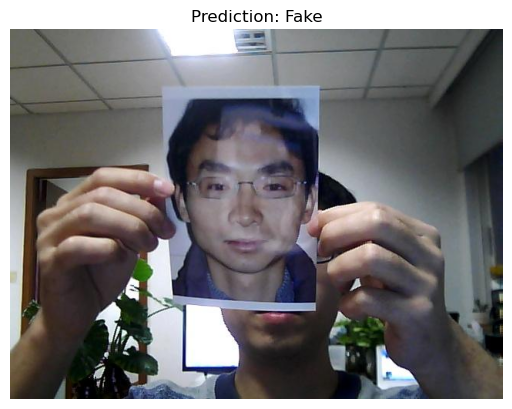

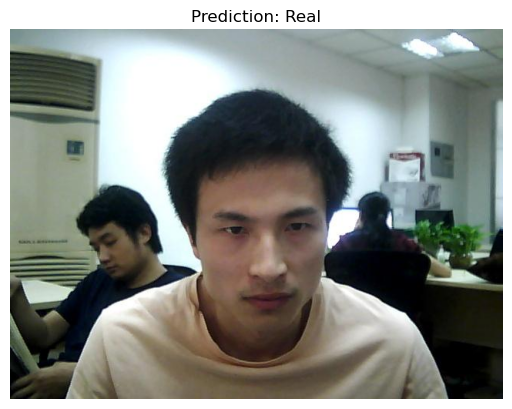

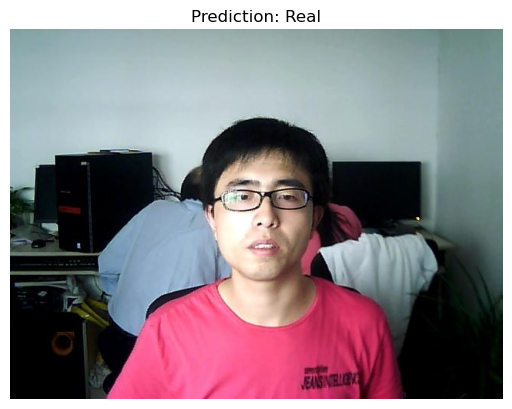

In [13]:
display_predictions(test_image_paths, predictions, num_images=10)